# Uvod u nadzirano strojno učenje 



### 1. Što je strojno učenje?
Arthur Samuel je opisao strojno učenje kao sposobnost računala da uči bez da je eksplicitno programirano. 
Novija i prihvaćenija definicija je ona Toma Mitchella: <br>
    Kažemo da program uči zadatak T kroz iskustvo E ako se njegova perfomansa P u izvođenju zadatka T poboljšava s rastom iskustva E. <br>
Primjer: igranje šaha <br>
    E = iskustvo stečeno kroz igranje mnogo partija šaha <br>
    T = igranje šaha <br>
    P = vjerojatnost da će program pobijediti iduću partiju šaha <br>

Osnovna podjela: 
1. nadzirano učenje - klasifikacija i regresija
2. nenadzirano učenje - grupiranje i smanjenje dimenzionalnosti

### 2. Primjeri strojnog učenja koji utječu na svakodnevicu

- SIRI koristi principe strojnog učenja i drugih tehnologija za imitaciju ljudskih reakcija <br>
- FACEBOOK koristi impresivnu tehnologiju kako bi predložio korisnicima koga trebaju *taggirati* na slikama <br>
- GOOGLE MAPS analizira brzinu u prometu koristeći anonimne lokacijske usluge s mobitela i tako predlaže najbržu rutu <br>
- GMAIL klasificira mailove, ali nedavno su predstavili i sustav koji predlaže tri automatska odgovora na mail <br>
- NETFLIX-u je strojno učenje nužno za prijedloge serija i filmova <br>
- UBER kroz strojno učenje procijenjuje brzinu dolaska na odredište <br>


U ovom radu bavit ću se linearnom i logističkom regresijom iz perspektive nadziranog strojnog učenja.
<br>U nadziranom učenju dani su nam podaci na temelju kojih predviđamo *output*. Postoje dvije, već navedene, kategorije - klasifikacija i regresija. <br>
    Klasifikaciju koristimo ako je _output_ **y** diskretna varijabla, dok regresiju kada je **y** kontinuirana varijabla.

### Primjeri nadziranog učenja:
**klasifikacija**: na temelju podataka koji sadrže veličinu tumora i podatak o tome je li tumor dobroćudan (0) ili zloćudan (1) želimo predvidjeti za koju veličinu tumora će tumor biti zloćudan/dobroćudan<br>
**regresija**: na temelju podataka koji sadrže veličinu kuće i cijenu za koju je ta kuća prodana želimo za svaku veličinu kuće predvidjeti njenu cijenu <br>
    

### 3. Funkcija pogreške 


Pretpostavimo da imamo podatke gdje je $x_{i}$ *input*, a $y_{i}$ *output*. Funkciju s kojom želimo predvidjeti *output* za svaki *input* zovemo **hipoteza**, ponekad i model, a označavamo s $h_{\theta}$, gdje je $\theta$ uređena n-torka parametara. <br>
Funkcija pogreške je zbroj kvadratnih odstupanja funkcije hipoteze u točki $x_{i}$ od stvarne, pripadajuće vrijednosti $y_{i}.$

$$J(\theta)=\frac{1}{2m}\sum_{i=1}^{m} (y_{i}-h_{\theta}(x_{i}))^2 $$	

m = broj "treninga", odnosno veličina danih podataka

Cilj nam je dobiti što bolju funkciju hipoteze, tj. **minimizirati funkciju pogreške**. *Idealno*, funkcija bi trebala proći kroz sve točke x. U tom slučaju je funkcija pogreške 0. 

### 4. Linearna regresija
Neka je funkcija hipoteze sljedećeg oblika: <br>$$h_{\theta}(x)=\theta_{n}\cdot x_{n}+\theta_{n-1}\cdot x_{n-1}+...+\theta_{1}\cdot x_{1}+\theta_{0}$$<br><br>
Notacija: $x_{j}^{(i)}$ = vrijednost svojstva j u i-tom treningu <br>
$x^{(i)}$ = svojstva i-tog treninga <br>
$m$ = broj treninga <br>
$n$ = broj svojstava 

#### Primjer 4.1.: Znamo populaciju nekog grada i zanima nas predviđen profit prodaje hrane u uslužnim djelatnostima s obzirom na dane podatke. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import matrix
import pandas as pd
from numpy.linalg import inv
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from mpl_toolkits.mplot3d import Axes3D
import copy
from sklearn.metrics import accuracy_score


%matplotlib inline

In [2]:
food = pd.read_csv('profit.txt', header=None,\
                   names=['populacija', 'profit'])
  

food.head(10)

,populacija,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


Korisno je prikazati podatke da bismo vidjeli kako nam model linearne regresije, tj. funkcija hipoteze treba izgledati.

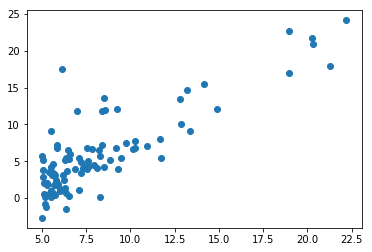

In [3]:
populacija = food.populacija.values
profit = food.profit.values
plt.scatter(populacija, profit, marker='o')

**Kod za izračunavanje funkcije greške:**

Prvo definirajmo funkciju za izračunavanje vrijednosti funkcije hipoteze s obzirom na parametar $\theta$ i dani $x$:

In [4]:
def h(X, theta):
    
    return X * theta

Funkciju za izračunavanje funkcije greške nazovimo cost:

In [5]:
def cost(theta, X, y):
    X = matrix(X)
    y = matrix(y)
    tmp1 = X * theta - y
    tmp2 = tmp1.T * tmp1 
    m = np.size(y) 
    
    return (1/(2*m)) * tmp2

### 5. Kako odrediti odgovarajuće parametre $\theta$?

Nakon što smo predstavili funkciju hipoteze i funkciju greške, preostaje
odrediti odgovarajuće parametre. To ćemo učiniti pomoću ***gradient descenta***.

Intuitivno, neka je funkcija hipoteze oblika $h_{\theta}(x)=\theta_{1}*x_{1}+\theta_{0}$. Nacrtamo graf koji na x-osi ima parametar $\theta_{0}$, a na y-osi $\theta_{1}$, dok je na z-osi vrijednost funkcije $J(\theta_{0},\theta_{1})$. Znamo da nam je cilj pronaći minimum takve funkcije. To ćemo postići tako da krenemo od bilo koje točke i promatramo tangentu u toj točki koja će nam "reći" u kojem pravcu se trebamo gibati kako bismo došli do minimuma. Gibamo se u koracima veličine $\alpha$. $\alpha$ ne smije biti niti prevelik niti premalen. Ako se povećanjem broja iteracija, funkcija greške povećava, trebamo smanjiti $\alpha$. No, ako je $\alpha$ premalen, konvergencija može biti jako spora.
        

**Algoritam:** <br>
*ponavljati dok ne konvergira:* <br>
     $\theta_{j}=\theta_{j}-\alpha\frac{\partial}{\partial\theta_{j}}J(\theta_{0},\theta_{1})\cdot x_{j} $ <br><br>
     $j=0,...,n$ <br>
     $x_{0}=1$

U matricu podataka potrebno je dodati u 1. stupac jedinice kako bismo mogli provesti prethodno napisani algoritam.

Možemo ubrzati taj algoritam tako da je svako svojstvo sličnog reda veličine. Za to postoje dva načina: <br>
1. skaliranje svojstava <br>
    $x_{i}:=\frac{x_{i}}{max(x)-min(x)}$
2. normalizacija <br>
    $x_{i}:=\frac{x_{i}-\mu_{i}}{s_{i}}$,  $\mu$ je očekivanje, a $s$ standardna devijacija


Vratimo se na prethodni primjer i izračunajmo parametre za linearnu regresiju. <br>
Prvo što je potrebno napisati je funkcija koja računa *gradient descent*. 

In [6]:
def gradient_descent(theta, X, y, alpha, iterations):
    X = matrix(X)
    y = matrix(y)
    m = np.size(y)
    step = alpha / m
    for i in range(iterations):
        theta -= step * X.T * (X*theta - y) 
    
    return theta

U svrhu daljnje analize podataka, podijelimo podatke na one s kojima ćemo *trenirati* linearni model i na one s kojima ćemo isti testirati.

In [7]:
populacija1 = food[['populacija']]
profit1 = food[['profit']]

In [8]:
populacija_trening, populacija_test, profit_trening, profit_test = \
train_test_split(populacija1, profit1, test_size=0.25, random_state=1)

Kao što je već napomenuto, za određivanje parametara $\theta$ u 1. stupac podataka dodajemo jedinice.

In [9]:
populacija_trening.insert(0, 'ones', 1)

Potrebno je odabrati proizvoljnu $\theta$ od koje želimo da algoritam gradient descent kreće. Neka je $\theta=(0,0)$.

In [10]:
theta = matrix(np.zeros((2, 1)))

Konačno, izračunajmo parametre $\theta_{0}$ i $\theta_{1}$ pomoću *gradient descenta*, odabiremo $\alpha$=0.01, a broj iteracija neka je 1500.

In [11]:
theta_new = gradient_descent(theta, populacija_trening, profit_trening, alpha=0.01, iterations=1500)
theta_new

matrix([[-3.73406206],
        [ 1.18402474]])

Iz svega napisanog slijedi: $$h_{\theta}(x)=-3.73 + 1.18\cdot x$$

Prikažimo sada podatke na istom grafu kao i pravac s procijenjenim parametrima.

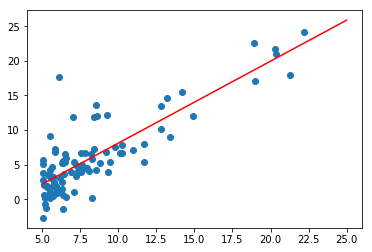

In [12]:
plt.scatter(populacija, profit, marker='o')
x_axis = np.arange(5.0, 25.0, 0.01)
h_food = theta_new[0] + theta_new[1] * x_axis
plt.plot(x_axis, h_food.T, c='r')

Provjerimo kolika nam je funkcija greške.

In [13]:
cost(theta_new, matrix(populacija_trening), matrix(profit_trening)).item(0)

4.745767763297124

Drugi način za  određivanje odgovarajućih parametara je **normalna jednadžba**. <br>
Ovom metodom, minimiziramo funkciju $J(\theta)$ tako da eksplicitno deriviramo po $\theta_{j}$ te derivacije izjednačavamo s 0. Tako nalazimo optimum bez iteracija. Parametar se određuje na sljedeći način: <br>
$$\theta=(X^{T}X)^{-1}X^{T}y$$ <br>
Ova metoda je bolja jer ne trebamo odabirati $\alpha$, nemamo iteracija, no složenija je i sporija ako je broj svojstava velik.

Na prethodnom primjeru odredimo $\theta$ metodom normalne jednadžbe:

Koristimo već zapisanu formulu $\theta=(X^{T}X)^{-1}X^{T}y$. <br>
Važno je napomenuti da, kao i za algoritam gradient descenta, vrijednost $x_{0}$ postavljamo na 1. 

In [14]:
theta_normal = inv(matrix(populacija_trening).T * matrix(populacija_trening)) *\
                   matrix(populacija_trening).T * matrix(profit_trening)
theta_normal

matrix([[-3.91425855],
        [ 1.20106494]])

Dakle, metodom normalne jednadžbe funkcija hipoteze je:
$$h_{\theta}(x)=-3.9+1.2\cdot x$$

In [15]:
cost(theta_normal, populacija_trening, profit_trening).item(0)

4.742388083390439

Uspoređujući funkciju troška s obzirom na parametre dobivene *gradient descentom* i normalnom jednadžbom, primjećujemo da su približno iste vrijednosti.

Postoji i treći način računanja, pomoću funkcije LinearRegression(): <br>
Trebamo uzeti u obzir da nam za ovaj način tablica podataka ne treba sadržavati 1. stupac jedinica.

In [16]:
populacija_trening2 = populacija_trening.drop('ones', axis=1)

In [17]:
linear_regression = LinearRegression()
linear_regression.fit(populacija_trening2, profit_trening)
print('Koeficijent za populacija je {}'.format(linear_regression.coef_[0][0]))

Koeficijent za populacija je 1.20106493803116


In [18]:
intercept = linear_regression.intercept_[0]
print('Sjecište s osi y iznosi {}'.format(intercept))

Sjecište s osi y iznosi -3.914258550869471


Dakle, i s trećim načinom dobivamo približno isti rezultat. Provjerimo točnost tako dobivene hipoteze na testnim podacima.

In [19]:
linear_regression.score(populacija_test, profit_test)

0.33277307953790625

Funkcija score() vraća koeficijent determinacije $R^{2}$. Što model bolje predviđa testne podatake, to je *score* bliži 1. 

### 6. Polinomijalna regresija
Hipoteza ne mora biti linearna funkcija ako dobro ne opisuje zadane podatke. Možemo promijeniti ponašanje krivulje tako da odaberemo kvadratnu, kubičnu ili neku sličnu krivulju. 

### 7. Logistička regresija

Što raditi kada imamo problem klasifikacije, tj. *output* je diskretna varijabla? <br>
*Primjer 7.1.*: Želimo napraviti algoritam koji prepoznaje spam mail. Neka je $y=1$ ako je to spam, u suprotnom $y=0$. Dakle, $y\in{0,1}$. <br>
0 se često naziva negativnom klasom, a 1 pozitivnom. 

Za potrebe klasifikacije, konstruiramo novu funkciju - **sigmoid function** ili **logistička funkcija**. <br>
$$h_{\theta}=g(\theta^{T}x)$$ <br>
$$z=\theta^{T}x$$ <br>
$$g(z)=\frac{1}{1+e^{-z}} $$

Sljedeća slika prikazuje izgled logističke funkcije:

In [20]:
def sigmoid(x):
    s = 1.0 + np.exp(-x)
    s = 1.0/s 
    
    return s

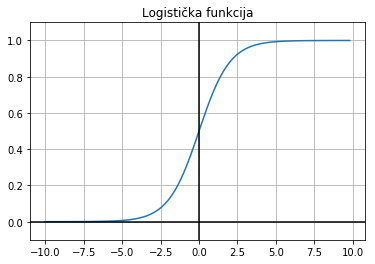

In [21]:
x = np.arange(-10., 10., 0.2)
y = np.linspace(0, len(x), len(x))

plt.plot(x, sigmoid(x))
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.ylim(-0.1, 1.1)
plt.title('Logistička funkcija')
plt.show()

Očito je da logistička funkcija poprima vrijednosti između 0 i 1 što je čini pogodnim izborom za klasifikacijske probleme. <br>
$h_{\theta}(x)$ daje **vjerojatnost** da je naš *output* 1. Preciznije, $h_{\theta}(x)=P(y=1|x;\theta)$

Uz sve rečeno, logistički model ili **granica odlučivanja** je linija koja razdvaja podatke gdje je y=1 od onih gdje je y=0. <br>
$h_{\theta}\geq0.5\rightarrow y=1$ <br>
$h_{\theta}<0.5\rightarrow y=0$

Potrebno je prilagoditi i funkciju greške zbog toga što bi logistička funkcija na prethodno definiranoj funkciji greške uzrokovala puno lokalnih optimuma, tj. ne bi bila konveksna. 

$$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}Cost(h_{\theta}(x^{(i)}),y^{(i)})$$

$Cost(h_{\theta}(x),y)=-log(h_{\theta}(x))$ ako y=1 <br>
$Cost(h_{\theta}(x),y)=-log(1-h_{\theta}(x))$ ako y=0 

In [22]:
def log_cost(theta, X, y):
    theta = np.matrix(theta).T
    m = np.size(y)
    J = -(y.T * np.log(sigmoid(X*theta))) - \
        ((1-y).T * np.log(1 - sigmoid(X*theta)))
    
    return J/m

Izgled funkcije greške logističke regresije s obzirom na vrijednosti y:

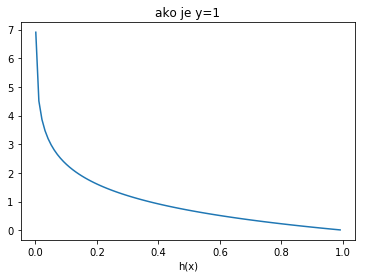

In [23]:
x = np.arange(0.001, 1., 0.01)
y = np.linspace(0, len(x), len(x))
sig = -np.log(x)
plt.plot(x, sig)
plt.title('ako je y=1')
plt.xlabel('h(x)')
plt.show()

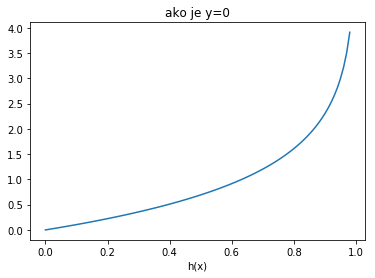

In [24]:
x = np.arange(0., 0.99, 0.01)
y = np.linspace(0, len(x), len(x))
sig = -np.log(1-x)
plt.plot(x, sig)
plt.title('ako je y=0')
plt.xlabel('h(x)')
plt.show()

Vidimo da je u oba slučaja funkcija greške konveksna funkcija.

Gradijent funkcije troška je vektor čiji je j-ti element definiran na sljedeći način:

$$\frac{\partial J(\theta)}{\partial \theta_{j}}=\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})\cdot x_{j}^{(i)}$$

In [25]:
def log_grad(theta, X, y):
    m = np.size(y)
    theta = matrix(theta).T
    grad = X.T * (sigmoid(X * theta) - y)
    
    return grad/m

#### Primjer 7.2.: Administratori smo sveučilišta i dani su nam podaci koji sadrže rezultate pojedinog studenta na dva različita testa i informaciju jesu li primljeni ili ne na studij. S obzirom na te podatke, želimo na temelju uspjeha na ta dva testa predvidjeti hoće li prijavljeni student biti primljen na studj. 

In [26]:
exams = pd.read_csv('studentsdata.txt', sep=',', names=['test_1', 'test_2', 'primljeni'])
exams.head(10)

,test_1,test_2,primljeni
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


Prvo je svakako korisno vizualizirati podatke:

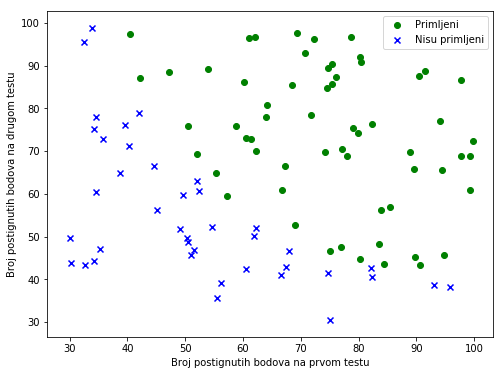

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))
pos = exams[exams['primljeni'].isin([1])]
neg = exams[exams['primljeni'].isin([0])]
ax.scatter(pos['test_1'], pos['test_2'], marker='o', c='g', label='Primljeni')
ax.scatter(neg['test_1'], neg['test_2'], marker='x', c='b', label='Nisu primljeni')
ax.legend()
ax.set_xlabel('Broj postignutih bodova na prvom testu')
ax.set_ylabel('Broj postignutih bodova na drugom testu')
plt.show()

Gdje su zeleno označeni primljeni, a plavo označeni nisu primljeni na fakultet. <br>


Da bismo odredili vjerojatnost primanja studenta na sveučilište s obzirom na dva testa, prvo moramo naći minimum funkcije greške, tj. odrediti parametre za logističku regresiju. U tu svrhu koristimo scipy funkciju **fmin_tnc**. 

In [28]:
def random_numbers_generator(a, b, d1, d2):
    v = np.random.rand(d1, d2)
    v = (b - a) * v + a 
    
    return v

In [29]:
theta = matrix(random_numbers_generator(-0.5, 0.5, 3, 1), dtype=float)

Kao i u primjeru 4.1., podijelimo podatke na one za trening i testne te u tablicu podataka dodajmo stupac jedinica. Za početnu $\theta$ uzimamo onu generiranu slučajnim odabirom. Pomoću definirane funkcije random_numbers_generator prilagodimo veličinu $\theta$. 

In [30]:
X_e = exams[['test_1', 'test_2']]
y_e = matrix(exams[['primljeni']])
Xe_train, Xe_test, ye_train, ye_test = train_test_split(X_e, y_e, test_size=0.25, random_state=1)

In [31]:
Xe_train.insert(0, 'ones', 1)

In [32]:
X_exams = matrix(Xe_train)
y_exams = matrix(ye_train)

In [33]:
parametri = opt.fmin_tnc(func=log_cost, fprime=log_grad, x0=theta, args=(X_exams, y_exams))
parametri = np.array(parametri[0])
parametri

array([-29.04968278,   0.2359142 ,   0.23712923])

Slijedi, $$h_{\theta}(x) = -28.69 + 0.23\cdot x1 + 0.23\cdot x2$$

Prikažimo dobivenu logističku regresiju na grafu zajedno s podacima:

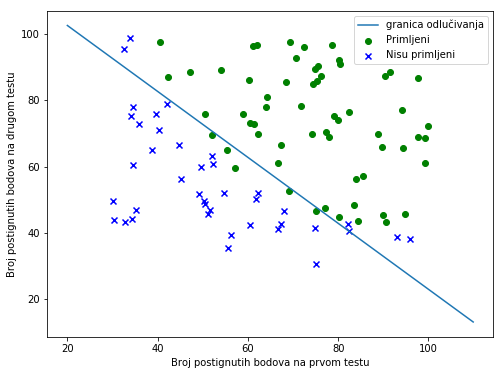

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))
pos = exams[exams['primljeni'].isin([1])]
neg = exams[exams['primljeni'].isin([0])]
ax.scatter(pos['test_1'], pos['test_2'], marker='o', c='g', label='Primljeni')
ax.scatter(neg['test_1'], neg['test_2'], marker='x', c='b', label='Nisu primljeni')
x = np.arange(20, 110, 0.1)
ax.plot(x, (- parametri[0] - parametri[1] * x) / parametri[2], label='granica odlučivanja')
ax.legend()
ax.set_xlabel('Broj postignutih bodova na prvom testu')
ax.set_ylabel('Broj postignutih bodova na drugom testu')
plt.show()

Izračunajmo i funkciju greške:

In [35]:
log_cost(parametri, X_exams, y_exams).item(0)

0.17551470749193906

Pretpostavimo da imamo studenta koji je na prvom testu ostvario 45 bodova, a na drugom 85. Izračunajmo vjerojatnost da bude primljen na sveučilište.

In [36]:
def predict(theta, x):
    p = sigmoid(x * theta)
    
    return p

In [37]:
student = matrix(np.array([1, 45, 85]))
vjerojatnost = predict(matrix(parametri).T, student)
'{0:.2f}%'.format(vjerojatnost.item(0)*100)

'84.84%'

### 8. Problem *overfittinga*

Promatrajmo problem predviđanja y s obzirom na x $\in R$. Prvi graf prikazuje rezultat prilagdođavanja $y=\theta_{0}+\theta_{1}x$ zadanim podacima. Vidimo da podaci zapravo ne leže na ravnoj liniji pa procjena nije dovoljno dobra. <br>
Međutim, postoji i opasnost u dodavanju previše svojstava. Drugi graf je rezultat opisivanja podataka polinomom stupnja 2. Iako krivulja savršeno opisuje zadane podatke, postoji mogućnost da ona nije dobar predikator. <br>



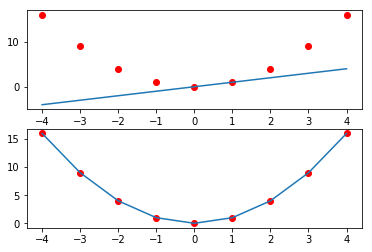

In [38]:
def f1(t):
    return t

def f3(t):
    return t**2

x = np.arange(-4, 5, 1)
y1 = f3(x)
plt.figure(1)
plt.subplot(211)
plt.plot(x, y1, 'ro')
plt.plot(x, f1(x))

plt.subplot(212)
y2 = f3(x)
plt.plot(x, y1, 'ro')
plt.plot(x, y2)

Kažemo da je prvi graf primjer *underfittinga* - krivulja ne opisuje dobro podatke, dok je drugi graf primjer potencijalnog *overfittinga*. <br>  <br>
**Kada se overfitting može dogoditi?**<br>
Uzmimo za primjer da nam je dan neki skup podataka na temelju kojega želimo predvidjeti vrijednosti *outputa* za bilo koji *input*. Sljedeće što nam se može dogoditi je da s funkcijom hipoteze savršeno opišemo naše dane podatke, no ako uzmemo neki novi *input* $x$ da funkcija hipoteze ne predviđa dobar *output* $y$. Kao što je već spomenuto, to se može dogoditi ako treniramo model na cijelom skupu podataka koje imamo i tako prouzročimo da model savršeno radi za te podatke, no za nove, testne podatke ne daje dobar rezultat. <br><br>
**Rješavanje problema overfittinga:** <br>
1. smanjenje broja svojstava
2. regularizacija

**Smanjenje broja svojstava:** <br>
Trebamo odlučiti/provesti testove koji su nam parametri od veće važnosti i s obzirom na njih istrenirati model, a druge parametre zanemariti.

**Regularizacija:** <br>
Funkcija troška postaje: <br>
$$\frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^{2}+\lambda\sum_{j=1}^{n}\theta_{j}^{2}$$

$\lambda$ je regularizacijski parametar. Koristeći takvu funkciju troška smanjujemo *overfitting*. No, $\lambda$ ne smije biti prevelik kako ne bismo došli do *underfittinga*. 

In [39]:
def cost_reg(theta, X, y, rate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    tmp1 = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    tmp2 = np.multiply((1 - y), np.log(1-sigmoid(X * theta.T)))
    regularization = (rate / (2 * len(X))) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    
    return np.sum(tmp1 - tmp2) / (len(X)) + regularization

**Regularizirana linearna i logistička regresija:** <br>
Modificirani gradijent: <br>
            Repeat {
 $$\theta_{0}:=\theta_{0}-\alpha\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_{0}^{(i)}$$ 
 $$\theta_{j}:=\theta_{j}-\alpha((\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_{j}^{(i)})+\frac{\lambda}{m}\theta_{j})$$
} <br>
j$\in${1,2,...,n}

In [40]:
def gradient_reg(theta, X, y, rate):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    rez = theta.size
    gradient = np.zeros(rez)
    razlika = sigmoid(X * theta.T) - y
    m = X.shape[0]
    for i in range(rez):
        tmp = np.multiply(razlika, X[:,i])
        if (i == 0):
            gradient[i] = np.sum(tmp) / len(X)
        else:
            gradient[i] = (np.sum(tmp) / len(X)) + ((rate / len(X)) * theta[:, i])
            
    return gradient

#### Primjer 8.1.: Pretpostavimo da vodimo tvornicu i na raspolaganju su nam podatci o mikročipovima s obzirom na dva testa. Na temelju tih testova, želimo procijeniti treba li mikročip biti stavljen u prodaju ili odbačen.

In [41]:
chips = pd.read_csv('chips.txt', delimiter=',', names=['prvi_test', 'drugi_test', 'primljeni'])
chips.loc[50:60, :]

,prvi_test,drugi_test,primljeni
50,0.137670,0.575290,1
51,-0.006336,0.399850,1
52,-0.092742,0.553360,1
53,-0.207950,0.355990,1
54,-0.207950,0.173250,1
55,-0.438360,0.217110,1
56,-0.219470,-0.016813,1
57,-0.138820,-0.272660,1
58,0.183760,0.933480,0
59,0.224080,0.779970,0


Zašto ćemo na ovim podacima koristiti regulariziranu logističku regresiju? <br>
Pogledajmo kako podaci izgledaju.

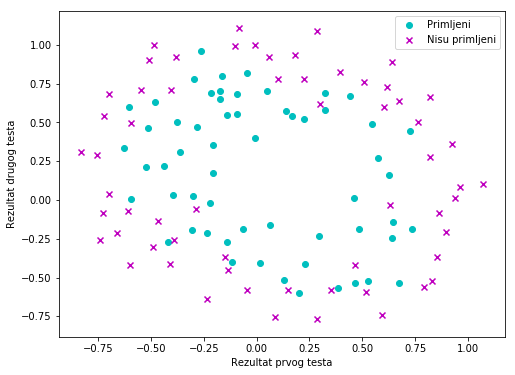

In [42]:
fig,ax = plt.subplots(figsize=(8, 6))
pos_c = chips[chips['primljeni'].isin([1])]
neg_c = chips[chips['primljeni'].isin([0])]
ax.scatter(pos_c['prvi_test'], pos_c['drugi_test'], marker='o', c='c', label='Primljeni')
ax.scatter(neg_c['prvi_test'], neg_c['drugi_test'], marker='x', c='m', label='Nisu primljeni')
ax.legend()
ax.set_xlabel('Rezultat prvog testa')
ax.set_ylabel('Rezultat drugog testa')
plt.show()

Jasno je da podaci ne mogu biti razdvojeni ravnom linijom na skup onih koji su primljeni i onih koji nisu primljeni za daljnju prodaju. Zbog toga *"obična"* logistička regresija neće dobro predviđati rezultate jer ona može pronaći samo linearnu granicu odlučivanja. Primjećujemo da nam treba polinom višeg stupnja kao dobra linija odlučivanja, no uzmemo li prevelik stupanj, postoji mogućnost *overfittinga*. Zato pristupamo problemu pomoću regularizirane logističke regresije kako bismo izbjegli *overfitting*. Podatke dijelimo u one za trening i testne. <br>
U matricu podataka, osim stupca jedinica, sada dodajemo polinomijalna svojstva, a izbacujemo stupce *inputa* za trening. 
Polinomijalna svojstva, s obzirom na stupanj 6 su oblika : 1, $x_{1}$, $x_{2}$, $x_{1}^{2}$, $x_{1}\cdot x_{2}$, $x_{2}^{2}$, $x_{1}^{3}$, ...  , $x_{1}\cdot x_{2}^{5}$,  $x_{2}^{6}.$ <br>
Napišimo funkciju za dodavanje polinomijalnih svojstava:

In [43]:
def mapfeature(X1, X2):
    degree = 6
    for i in range(1, degree):
        for j in range(0, i):
            chips['F' + str(i) + str(j)] = np.power(X1, i-j) * np.power(X2, j) 

    return chips

In [44]:
x1 = chips['prvi_test']
x2 = chips['drugi_test']

In [45]:
data = mapfeature(x1, x2)

Pogledajmo kako tablica podataka izgleda nakon dodavanja polinomijalnih svojstava.

In [46]:
data.head()

,prvi_test,drugi_test,primljeni,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43,F50,F51,F52,F53,F54
0,0.051267,0.69956,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551,3.541519e-07,0.000005,0.000066,0.000900,0.012278
1,-0.092742,0.68494,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801,-6.860919e-06,0.000051,-0.000374,0.002764,-0.020412
2,-0.213710,0.69225,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895,-4.457837e-04,0.001444,-0.004677,0.015151,-0.049077
3,-0.375000,0.50219,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494,-7.415771e-03,0.009931,-0.013299,0.017810,-0.023851
4,-0.513250,0.46564,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818,-3.561597e-02,0.032312,-0.029315,0.026596,-0.024128


In [47]:
stupci = data.shape[1]
X_chips = data.iloc[:,3:stupci]
Y_chips = data.iloc[:,2:3]

In [48]:
theta_chips = np.zeros(16)

In [49]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_chips, Y_chips, test_size=0.25, random_state=1)

Kao i uvijek, da bismo mogli odrediti funkciju troška, u podatke dodajemo stupac jedinica i računamo funkciju troška na podacima za trening s obzirom na $\theta$.

In [50]:
Xc_train.insert(0, 'ones', 1)
cost_reg(theta_chips, Xc_train, yc_train, rate=1)

0.6931471805599453

Funkcija troška, s obzirom na $\theta=0$, iznosi 0.7.

Pronađimo minimum funkcije troška pomoću funkcije fmin_tnc kao i u prethodnim primjerima.

Uzimamo regularizacijski parametar, $\lambda=1$ i $\theta=0$.

In [51]:
rate = 1

In [52]:
res = opt.fmin_tnc(func=cost_reg, x0=theta_chips, fprime=gradient_reg, args=(Xc_train, yc_train, rate))
res

(array([ 0.75368935,  0.23764274, -1.58242472, -0.66422255, -0.13557143,
        -0.21302341, -0.17599595, -1.2420661 , -0.0425887 , -0.64527528,
        -0.09121118, -0.33529966, -0.11813911, -0.07675087, -0.22929084,
        -0.10183409]), 19, 1)

In [53]:
cost_reg(res[0], Xc_train, yc_train, rate=1)

0.6142817383053731

Provedimo treniranje modela pomoću funkcije LogisticRegression() na istim podacima i s istim parametrom učenja.

In [54]:
Xc_train = Xc_train.drop(columns=['ones'])
yc_train = np.array(yc_train).ravel()

In [55]:
logreg3 = LogisticRegression()
logreg3.fit(Xc_train, yc_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
for idx, col_name in enumerate(Xc_train.columns):
    print('Koeficijent za {} je {}'.format(col_name, logreg3.coef_[0][idx]))

Koeficijent za F10 je 0.23225552308283326
Koeficijent za F20 je -1.5042335040123727
Koeficijent za F21 je -0.6752920595231481
Koeficijent za F30 je -0.1365608571281592
Koeficijent za F31 je -0.20510958463773146
Koeficijent za F32 je -0.1717709698396935
Koeficijent za F40 je -1.2262277143612321
Koeficijent za F41 je -0.0439005603494383
Koeficijent za F42 je -0.6278189689235035
Koeficijent za F43 je -0.09587452587995393
Koeficijent za F50 je -0.33767543669241923
Koeficijent za F51 je -0.11660849251077222
Koeficijent za F52 je -0.07561368388768104
Koeficijent za F53 je -0.2235971299208056
Koeficijent za F54 je -0.10117134713506892


In [57]:
intercept4 = logreg3.intercept_[0]
print('Sjeciste s osi y iznosi {}'.format(intercept4))

Sjeciste s osi y iznosi 0.6980178191555542


Primjećujemo da smo dobili približno iste parametre u oba načina.

Izračunajmo točnost modela na testnim podacima:

In [58]:
logreg3.score(Xc_test, yc_test)

0.5

Za kraj, vratimo se na primjer 7.2.: Administratori smo nekog sveučilišta i želimo procijeniti vjerojatnost primanja na sveučilište svakog prijavljenog studenta s obzirom na rezultate postignute na dva testa. 
<br> Provedimo opet logističku regresiju, no sada s regularizacijskim parametrom 1 u svrhu izbjegavanja potencijalnog *overfittinga*.

In [59]:
ye_train = np.array(ye_train).ravel()
Xe_train = Xe_train.drop(columns=['ones'])

In [60]:
logreg2 = LogisticRegression()

In [61]:
logreg2.fit(Xe_train, ye_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
for idx, col_name in enumerate(Xe_train.columns):
    print('Koeficijent za {} je {}'.format(col_name, logreg2.coef_[0][idx]))

Koeficijent za test_1 je 0.03116754111445834
Koeficijent za test_2 je 0.029897026871488992


In [63]:
intercept3 = logreg2.intercept_[0]
print('Sjecište s osi y iznosi {}'.format(intercept3))

Sjecište s osi y iznosi -3.293035712965923


Slijedi, $h_{\theta}(x) = -3.29 + 0.03\cdot x1 + 0.03\cdot x2$

Prikažimo tako dobiven model s prethodno dobivenim modelom za taj skup podataka:

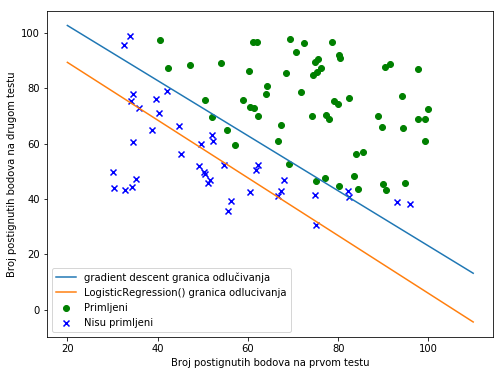

In [64]:
fig, ax = plt.subplots(figsize=(8, 6))
pos = exams[exams['primljeni'].isin([1])]
neg = exams[exams['primljeni'].isin([0])]
ax.scatter(pos['test_1'], pos['test_2'], marker='o', c='g', label='Primljeni')
ax.scatter(neg['test_1'], neg['test_2'], marker='x', c='b', label='Nisu primljeni')
x = np.arange(20, 110, 0.1)
ax.plot(x, (- parametri[0] - parametri[1] * x) / parametri[2], label='gradient descent granica odlučivanja')
ax.plot(x, (- logreg2.intercept_[0] - logreg2.coef_[0][0] * x) / logreg2.coef_[0][1],\
        label='LogisticRegression() granica odlucivanja')
ax.legend()
ax.set_xlabel('Broj postignutih bodova na prvom testu')
ax.set_ylabel('Broj postignutih bodova na drugom testu')
plt.show()

Primjećujemo da se granica odlučivanja dobivena metodom *gradient descenta* razlikuje od one dobivene pozivanjem funkcije LogisticRegression(). <br>
To je rezultat regulariziranja parametra u metodi LogisticRegression() u svrhu smanjenja potencijalnog *overfittinga* modela na podacima za trening. 

Za kraj provjerimo koji model bolje predviđa testne podatke.

In [65]:
ye_pred_logreg = logreg2.predict(Xe_test)

In [66]:
accuracy_score(matrix(ye_test), ye_pred_logreg)

0.72

In [67]:
Xe_test.insert(0, 'ones', 1)

In [68]:
ye_pred_gd = matrix(Xe_test) * matrix(parametri).T

In [69]:
ye_pred_gd[ye_pred_gd < .5] = 0
ye_pred_gd[ye_pred_gd >= .5] = 1

In [70]:
accuracy_score(matrix(ye_test), ye_pred_gd)

0.84

Regularizirani logistički model daje točnost od 72%, dok neregularizirani 84%. Ovaj primjer pokazuje da regularizirani model nije uvijek nužno bolji i da se lako dođe do *underfittinga*. No, ne treba zanemariti činjenicu da je primjer proveden na relativno malom skupu podataka što može prouzročiti krive zaključke.